In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df = train_df.drop('Cabin',1)
test_df = test_df.drop('Cabin',1)

In [10]:
survived_ls = list(train_df['Survived'].values)
train_df = train_df.drop('Survived',1)
train_df['Survived'] = survived_ls
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [11]:
train_df['Age'].fillna((train_df['Age'].median()), inplace = True)
test_df['Age'].fillna((test_df['Age'].median()), inplace = True)
test_df['Fare'].fillna(test_df['Age'].median(), inplace = True)

#Finding which indexes have missing values in 'Embarked' column and replacing them with mode
print(train_df['Embarked'][(train_df['Embarked'] != 'S') & (train_df['Embarked'] != 'C') & (train_df['Embarked'] != 'Q')])
train_df['Embarked'].iloc[829] = 'S'
train_df['Embarked'].iloc[61] = 'S'

"""DIDN'T WORK BUT WHY?
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace = True)
test_df['Embarked'].fillna(test_df['Embarked'].mode(), inplace = True)
"""

61     NaN
829    NaN
Name: Embarked, dtype: object


"DIDN'T WORK BUT WHY?\ntrain_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace = True)\ntest_df['Embarked'].fillna(test_df['Embarked'].mode(), inplace = True)\n"

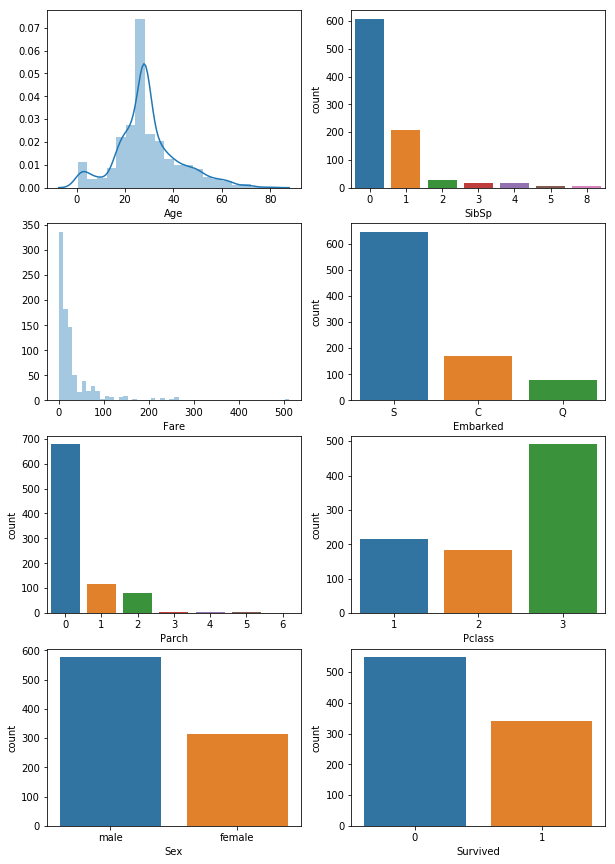

In [12]:
plt.figure(figsize = (10,15))

plt.subplot(4,2,1)
sns.distplot(train_df['Age'], bins = 20)
plt.xlabel('Age')

plt.subplot(4,2,2)
_ = sns.countplot(train_df['SibSp'])

plt.subplot(4,2,3)
_ = sns.distplot(train_df['Fare'], bins = 50, kde = False)
plt.xlabel('Fare')

plt.subplot(4,2,4)
_ = sns.countplot(train_df['Embarked'])
plt.xlabel('Embarked')

plt.subplot(4,2,5)
_ = sns.countplot(train_df['Parch'])

plt.subplot(4,2,6)
_ = sns.countplot(train_df['Pclass'])

plt.subplot(4,2,7)
_ = sns.countplot(train_df['Sex'])

plt.subplot(4,2,8)
_ = sns.countplot(train_df['Survived'])

In [13]:
train_df = train_df.drop('Name', 1)
test_df = test_df.drop('Name', 1)
train_df = train_df.drop('Ticket', 1)
test_df = test_df.drop('Ticket', 1)
train_df = train_df.drop('PassengerId', 1)
passengerId_ls_test = test_df['PassengerId'].values
test_df = test_df.drop('PassengerId', 1)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Survived    891 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [16]:
train_df.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
5,3,male,28.0,0,0,8.4583,Q,0
6,1,male,54.0,0,0,51.8625,S,0
7,3,male,2.0,3,1,21.0750,S,0
8,3,female,27.0,0,2,11.1333,S,1
9,2,female,14.0,1,0,30.0708,C,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'].values)
test_df['Embarked'] = le.fit_transform(test_df['Embarked'].values)
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'].values)
test_df['Sex'] = le.fit_transform(test_df['Sex'].values)

In [18]:
train_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1


In [19]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.values

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(categorical_features = [6])
X_train = one_hot_encoder.fit_transform(X_train).toarray()
one_hot_encoder = OneHotEncoder(categorical_features = [6])
X_test = one_hot_encoder.fit_transform(X_test).toarray()

/home/architkhatri/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/home/architkhatri/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
X_train[0]

array([ 0.  ,  0.  ,  1.  ,  3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.25)

In [24]:
#Machine Learning

#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train1, y_train1)
logistic_reg_pred = logistic_reg.predict(X_val)
print("Accuracy on training set: {}".format(logistic_reg.score(X_train1, y_train1)))
print("Accuracy on validation set: {}".format(logistic_reg.score(X_val, y_val)))

cm = confusion_matrix(y_val, logistic_reg_pred)
print(cm)

Accuracy on training set: 0.7934131736526946
Accuracy on validation set: 0.8295964125560538
[[128  17]
 [ 21  57]]


In [25]:
#K-Nearest-Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric='minkowski',p=2)
knn.fit(X_train1, y_train1)
knn_pred = knn.predict(X_val)
print("Number of neighbors = 6")
print("Accuracy on training set: {}".format(knn.score(X_train1, y_train1)))
print("Accuracy on validation set: {}".format(knn.score(X_val, y_val)))

cm = confusion_matrix(y_val, knn_pred)
print(cm)
print("-----------------------------------------------")
#------------------------------------------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
knn.fit(X_train1, y_train1)
knn_pred = knn.predict(X_val)
print("Number of neighbors = 5")
print("Accuracy on training set: {}".format(knn.score(X_train1, y_train1)))
print("Accuracy on validation set: {}".format(knn.score(X_val, y_val)))

cm = confusion_matrix(y_val, knn_pred)
print(cm)
print("-----------------------------------------------")
#------------------------------------------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 4, metric='minkowski',p=2)
knn.fit(X_train1, y_train1)
knn_pred = knn.predict(X_val)
print("Number of neighbors = 4")
print("Accuracy on training set: {}".format(knn.score(X_train1, y_train1)))
print("Accuracy on validation set: {}".format(knn.score(X_val, y_val)))

cm = confusion_matrix(y_val, knn_pred)
print(cm)
print("-----------------------------------------------")
#------------------------------------------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 3, metric='minkowski',p=2)
knn.fit(X_train1, y_train1)
knn_pred = knn.predict(X_val)
print("Number of neighbors = 3")
print("Accuracy on training set: {}".format(knn.score(X_train1, y_train1)))
print("Accuracy on validation set: {}".format(knn.score(X_val, y_val)))

cm = confusion_matrix(y_val, knn_pred)
print(cm)

Number of neighbors = 6
Accuracy on training set: 0.8308383233532934
Accuracy on validation set: 0.852017937219731
[[137   8]
 [ 25  53]]
-----------------------------------------------
Number of neighbors = 5
Accuracy on training set: 0.8562874251497006
Accuracy on validation set: 0.852017937219731
[[133  12]
 [ 21  57]]
-----------------------------------------------
Number of neighbors = 4
Accuracy on training set: 0.8413173652694611
Accuracy on validation set: 0.8385650224215246
[[138   7]
 [ 29  49]]
-----------------------------------------------
Number of neighbors = 3
Accuracy on training set: 0.8652694610778443
Accuracy on validation set: 0.8340807174887892
[[131  14]
 [ 23  55]]


In [26]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(X_train1, y_train1)
gaussianNB_pred = gaussianNB.predict(X_val)
print("Accuracy on train set: {}".format(gaussianNB.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(gaussianNB.score(X_val, y_val)))

cm = confusion_matrix(y_val, gaussianNB_pred)
print(cm)

Accuracy on train set: 0.781437125748503
Accuracy on test set: 0.8161434977578476
[[126  19]
 [ 22  56]]


In [27]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 1.0 (Default)")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 1.5)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 1.5")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 2)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 2")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 0.5)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 0.5")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 5)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 5")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 10)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 10 (Best)")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 20)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 20")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 15)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 15")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)
print("-----------------------------------------------")

svc = SVC(C = 7.5)
svc.fit(X_train1, y_train1)
svc_pred = svc.predict(X_val)
print("C = 7.5")
print("Accuracy on train set: {}".format(svc.score(X_train1, y_train1)))
print("Accuracy on test set: {}".format(svc.score(X_val, y_val)))
cm = confusion_matrix(y_val, svc_pred)
print(cm)

C = 1.0 (Default)
Accuracy on train set: 0.8293413173652695
Accuracy on test set: 0.8430493273542601
[[134  11]
 [ 24  54]]
-----------------------------------------------
C = 1.5
Accuracy on train set: 0.8353293413173652
Accuracy on test set: 0.8430493273542601
[[134  11]
 [ 24  54]]
-----------------------------------------------
C = 2
Accuracy on train set: 0.8383233532934131
Accuracy on test set: 0.8385650224215246
[[134  11]
 [ 25  53]]
-----------------------------------------------
C = 0.5
Accuracy on train set: 0.8218562874251497
Accuracy on test set: 0.8475336322869955
[[134  11]
 [ 23  55]]
-----------------------------------------------
C = 5
Accuracy on train set: 0.8458083832335329
Accuracy on test set: 0.8340807174887892
[[132  13]
 [ 24  54]]
-----------------------------------------------
C = 10 (Best)
Accuracy on train set: 0.8488023952095808
Accuracy on test set: 0.852017937219731
[[135  10]
 [ 23  55]]
-----------------------------------------------
C = 20
Accuracy o

In [28]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train1, y_train1)
rf_classifier_pred = rf_classifier.predict(X_val)
print(rf_classifier.score(X_train1, y_train1))
print(rf_classifier.score(X_val, y_val))
cm = confusion_matrix(y_val, rf_classifier_pred)
print(cm)

0.9820359281437125
0.820627802690583
[[127  18]
 [ 22  56]]


In [29]:
#DEEP LEARNING
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

# Initialising the ANN
ann_classifier = Sequential()

# Adding the input layer and the first hidden layer
ann_classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

# Adding the second hidden layer
ann_classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(BatchNormalization(axis = 1))
ann_classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
ann_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
#ann_classifier.fit(X_train, y_train, batch_size = 10, epochs = 30, validation_split = 0.3)
ann_classifier.fit(X_train, y_train, batch_size = 10, epochs = 30)

Using TensorFlow backend.


Epoch 1/30
891/891 [==============================] - 2s 2ms/step - loss: 0.6408 - acc: 0.6790
Epoch 2/30
891/891 [==============================] - 0s 174us/step - loss: 0.4892 - acc: 0.7823
Epoch 3/30
891/891 [==============================] - 0s 223us/step - loss: 0.4564 - acc: 0.7957
Epoch 4/30
891/891 [==============================] - 0s 197us/step - loss: 0.4412 - acc: 0.8013
Epoch 5/30
891/891 [==============================] - 0s 180us/step - loss: 0.4582 - acc: 0.8036
Epoch 6/30
891/891 [==============================] - 0s 182us/step - loss: 0.4539 - acc: 0.8036
Epoch 7/30
891/891 [==============================] - 0s 218us/step - loss: 0.4477 - acc: 0.8081
Epoch 8/30
891/891 [==============================] - 0s 189us/step - loss: 0.4377 - acc: 0.8092
Epoch 9/30
891/891 [==============================] - 0s 214us/step - loss: 0.4227 - acc: 0.8316
Epoch 10/30
891/891 [==============================] - 0s 191us/step - loss: 0.4227 - acc: 0.8193
Epoch 11/30
891/891 [==========

In [30]:
#Making predictions for submission
#Best performers are SVC, KNN, Random Forest, DEEP LEARNING
svc = SVC(C=10)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
svc_df['PassengerId'] = passengerId_ls_test
svc_df['Survived'] = svc_predict
svc_df.to_csv('submission_svc.csv', index = False)

knn = KNeighborsClassifier(n_neighbors = 4, metric='minkowski',p=2)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
knn_df['PassengerId'] = passengerId_ls_test
knn_df['Survived'] = knn_predict
knn_df.to_csv('submission_knn.csv', index = False)

rf_classifier = RandomForestClassifier(n_estimators = 2000, random_state = 42)
rf_classifier.fit(X_train, y_train)
rf_predict = rf_classifier.predict(X_test)
rf_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
rf_df['PassengerId'] = passengerId_ls_test
rf_df['Survived'] = rf_predict
rf_df.to_csv('submission_rf.csv', index = False)

ann_predict = ann_classifier.predict(X_test)
ann_predict = np.array(ann_predict > 0.5)
ann_predict_ls = []
for i in ann_predict:
    if i == True:
        ann_predict_ls.append(1)
    else:
        ann_predict_ls.append(0)
        
ann_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
ann_df['PassengerId'] = passengerId_ls_test
ann_df['Survived'] = ann_predict_ls
ann_df.to_csv('submission_ann.csv', index = False)

In [31]:
svc_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [32]:
knn_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [33]:
rf_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [34]:
ann_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
